# Домашнее задание

В этом домашнем задании предлагаем вам попрактиковаться в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


In [44]:
data.tail()

,open,high,low,close,volume
timestamp,,,,,
2023-07-03 23:35:00,31126.23,31163.0,31118.99,31126.93,24.7985
2023-07-03 23:40:00,31127.02,31163.0,31120.30,31136.55,28.1264
2023-07-03 23:45:00,31136.55,31156.0,31120.30,31134.78,44.0049
2023-07-03 23:50:00,31134.94,31176.0,31120.30,31158.82,54.4029
2023-07-03 23:55:00,31158.81,31182.0,31131.70,31157.42,17.7158


Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

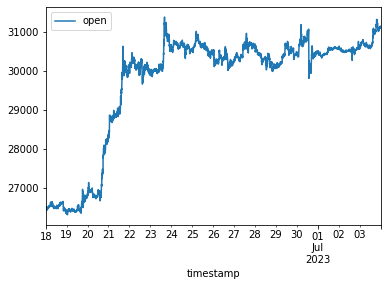

In [45]:
data = data[['open']]

data.plot()
plt.show()

Проделайте следующие шаги:

* Разбейте данные на тренировочную и тестовую часть. В тест отправьте 15% данных

* Извлеките лаговые признаки

* Извлеките агрегированные признаки (средняя стоимость за день, час)

Рекомендуется использовать функцию preprocess_data с вебинара (однако, надо будет незначительно ее поменять, исходя из данных задачи).

Задайте гиперпараметры по умолчанию (в функции preprocess_data, если будете использовать ее):
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [46]:
# shift by one step (5 minutes)
data.shift(1).head()

,open
timestamp,
2023-06-18 00:00:00,NaN
2023-06-18 00:05:00,26519.10
2023-06-18 00:10:00,26508.01
2023-06-18 00:15:00,26511.30
2023-06-18 00:20:00,26519.44


In [47]:
# shift by 5 steps (25 minutes)
data['open'].shift(5).head(10)

timestamp
2023-06-18 00:00:00         NaN
2023-06-18 00:05:00         NaN
2023-06-18 00:10:00         NaN
2023-06-18 00:15:00         NaN
2023-06-18 00:20:00         NaN
2023-06-18 00:25:00    26519.10
2023-06-18 00:30:00    26508.01
2023-06-18 00:35:00    26511.30
2023-06-18 00:40:00    26519.44
2023-06-18 00:45:00    26513.33
Name: open, dtype: float64

In [48]:
for i in range(1, 4):
    data[f'lag_{i}'] = data['open'].shift(i)
    
data = data.dropna()
data.head(10)

,open,lag_1,lag_2,lag_3
timestamp,,,,
2023-06-18 00:15:00,26519.44,26511.30,26508.01,26519.10
2023-06-18 00:20:00,26513.33,26519.44,26511.30,26508.01
2023-06-18 00:25:00,26437.12,26513.33,26519.44,26511.30
2023-06-18 00:30:00,26477.27,26437.12,26513.33,26519.44
2023-06-18 00:35:00,26442.69,26477.27,26437.12,26513.33
2023-06-18 00:40:00,26447.93,26442.69,26477.27,26437.12
2023-06-18 00:45:00,26404.98,26447.93,26442.69,26477.27
2023-06-18 00:50:00,26413.75,26404.98,26447.93,26442.69
2023-06-18 00:55:00,26430.23,26413.75,26404.98,26447.93


In [49]:
data['day'] = data.index.day
data['hour'] = data.index.hour

/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
data.groupby('day').agg({'open': 'mean'})

,open
day,
1,30512.006528
2,30541.364583
3,30829.732917
18,26515.122702
19,26510.399653
20,27201.300417
21,29302.246979
22,30110.849201
23,30352.407917


In [55]:
data.loc['2023-07-03 23:35:00':]

,open,lag_1,lag_2,lag_3,day,hour
timestamp,,,,,,
2023-07-03 23:35:00,31126.23,31117.26,31112.99,31118.32,3,23
2023-07-03 23:40:00,31127.02,31126.23,31117.26,31112.99,3,23
2023-07-03 23:45:00,31136.55,31127.02,31126.23,31117.26,3,23
2023-07-03 23:50:00,31134.94,31136.55,31127.02,31126.23,3,23
2023-07-03 23:55:00,31158.81,31134.94,31136.55,31127.02,3,23


In [65]:
data.shape

(4605, 6)

In [62]:
train_size = int(data.shape[0] * 0.85)
train_size

3914

In [63]:
data.iloc[:train_size].shape

(3914, 6)

In [64]:
data.iloc[train_size:].shape

(691, 6)

In [95]:
data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


In [96]:
data = data[['open']]
data.head()

,open
timestamp,
2023-06-18 00:00:00,26519.10
2023-06-18 00:05:00,26508.01
2023-06-18 00:10:00,26511.30
2023-06-18 00:15:00,26519.44
2023-06-18 00:20:00,26513.33


In [97]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [98]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['open'].shift(i)
        
    data = data.dropna()
        
    #data['day'] = data.index.day
    data['hour'] = data.index.hour
    
    train_size = int(data.shape[0] * (1 - test_size))
    
    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    #data["day_average"] = list(map(code_mean(data.iloc[:train_size], "day", "open").get, data.day))
    data["hour_average"] = list(map(code_mean(data.iloc[:train_size], "hour", "open").get, data.hour))
    
    # выкидываем закодированные средними признаки
    #data.drop(["day"], axis=1, inplace=True)
    data.drop(["hour"], axis=1, inplace=True)
    
    data_train = data.iloc[:train_size]
    data_test = data.iloc[train_size:]
    
    X_train = data_train.drop('open', axis=1)
    y_train = data_train['open']
    X_test = data_test.drop('open', axis=1)
    y_test = data_test['open']

    return X_train, X_test, y_train, y_test

In [100]:
X_train, X_test, y_train, y_test = preprocess_data(data)
X_test.head()

,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,hour_average
timestamp,,,,,,,,,,,,,,,,
2023-07-01 14:35:00,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,29499.247178
2023-07-01 14:40:00,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,29499.247178
2023-07-01 14:45:00,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,29499.247178
2023-07-01 14:50:00,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,29499.247178
2023-07-01 14:55:00,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,29499.247178


Обучите линейную регрессию с гиперпараметрами по умолчанию на тренировочных данных и вычислите ошибку MAE на тестовых данных.

Чему она получилась равна? (Ответ округлите до целого числа).

Также нарисуйте график правильного ответа и прогноза на тесте.

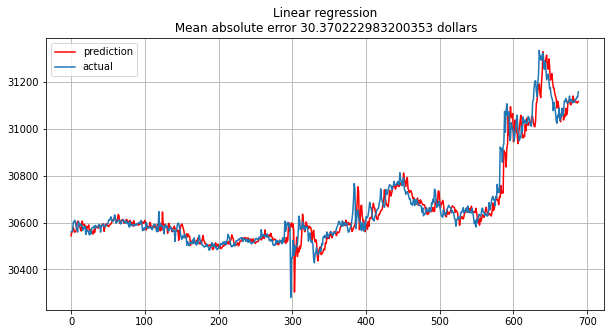

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} dollars");

Попробуйте подобрать гиперпараметры `lag_start`, `lag_end`, а также придумать новые полезные агрегрированные признаки для улучшения качества прогноза.

Пропорции разбиения (в тесте 15% данных) не трогайте. Ошибку MAE все так же считайте на тесте.

In [ ]:
# your code here